## Notebook Lección 6

### Objetivos Lección 6

1) Utilizar el método EWMA para estimar varianzas y covarianzas, entiendo los supuesto que implica. 

2) Utilizar el exponente de hurst para escalar matrices de varianzas y covarianzas.

### Ejercicio

Desarrolle los siguientes puntos:

1. Importe la serie del precio del S&P500

2. Obtenga la volatilidad por ventanas móviles

3. Utilice EWMA para considerar la heteroscedásticidad condicional

4. Importe la serie del precio del Bitcoin

5. Obtenga la volatilidad por ventanas móviles

6. Utilice EWMA para considerar la heteroscedásticidad condicional  

7. Obtenga la covarianza por ventanas móviles

8. Utilice EWMA para considerar la heteroscedásticidad condicional

9. Obtenga la correlación de la serie por ewma y comparela con la correlación sin EWMA

10. Estime la matriz de covarianza con el exponente de Hurst. Use la función que se dispuso mas abajo.

In [558]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import yfinance as yf

try: 
    # Import SnP data 
    snp = yf.Ticker("^GSPC")
    hist_snp = snp.history(period="max")
    hist_snp.index = hist_snp.index.date
    hist_snp.index = pd.to_datetime(hist_snp.index)
    hist_snp = hist_snp[hist_snp.index >= '1991-06-30']
    hist_snp.to_csv("SnP500.csv",encoding='utf-8')
    # Import Bitcoin data        
    bitcoin = yf.Ticker("BTC-USD")
    hist_bitcoin = bitcoin.history(period="max")
    hist_bitcoin.index = hist_bitcoin.index.date
    hist_bitcoin.index = pd.to_datetime(hist_bitcoin.index)
    hist_bitcoin.to_csv("Bitcoin.csv", encoding='utf-8')
except:
    hist_bitcoin = pd.read_csv("Bitcoin.csv")
    hist_snp = pd.read_csv("SnP500.csv", )
df = hist_snp.join(hist_bitcoin, rsuffix='_bitcoin').dropna()

### Ventanas Móviles (Caso S&P 500)

A continuación se replica el ejercicio documentado en el boletín de Risk Management de Goldman Sachs de Enero del 1998.

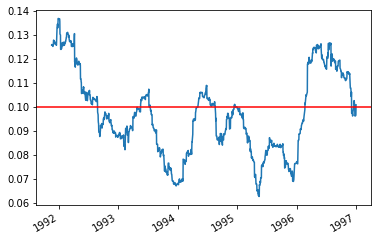

In [559]:
hist_snp = hist_snp.loc[hist_snp.index >= "1991-01-01"]
hist_snp = hist_snp.loc[hist_snp.index <= "1996-12-31"]
hist_snp.to_clipboard()
hist_snp['Log_Returns_snp'] = np.log((hist_snp['Close'].shift(-1)/hist_snp['Close']).shift(1))
volatility_snp = hist_snp['Log_Returns_snp'].std()
ax = (hist_snp.loc[:,'Log_Returns_snp'].rolling(window=100).apply(np.std, raw=True)*np.sqrt(252)).plot() 
ax.axhline(volatility_snp*np.sqrt(252), c='r')

### Estimar Volatilidades con EWMA

Se encuentra primero los retornos logarítmicos, para después obtener la serie de la desviación estándar usando una ventana de 21 días

In [560]:

df['Log_Returns_snp'] = np.log((df['Close'].shift(-1)/df['Close']).shift(1))
df['Log_Returns_btc'] = np.log((df['Close_bitcoin'].shift(-1)/df['Close_bitcoin']).shift(1))
# Calculamos la volatilidad, la correlación y la covarianza en ventanas de 20 días
window = 21
df['Sd_snp'] = df['Log_Returns_snp'].rolling(window=window).apply(np.std, raw=True)
df['Sd_btc'] = df['Log_Returns_btc'].rolling(window=window).apply(np.std, raw=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open_bitcoin,High_bitcoin,Low_bitcoin,Close_bitcoin,Volume_bitcoin,Dividends_bitcoin,Stock Splits_bitcoin,Log_Returns_snp,Log_Returns_btc,Sd_snp,Sd_btc
2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000,0.0,0.0,465.864014,468.174011,452.421997,457.334015,2.105680e+07,0.0,0.0,NaN,NaN,NaN,NaN
2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000,0.0,0.0,456.859985,456.859985,413.104004,424.440002,3.448320e+07,0.0,0.0,0.004879,-0.074643,NaN,NaN
2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000,0.0,0.0,424.102997,427.834991,384.532013,394.795990,3.791970e+07,0.0,0.0,-0.000477,-0.072402,NaN,NaN
2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000,0.0,0.0,399.100006,406.915985,397.130005,402.152008,2.412760e+07,0.0,0.0,-0.008046,0.018461,NaN,NaN
2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000,0.0,0.0,402.092010,441.557007,396.196991,435.790985,4.509950e+07,0.0,0.0,-0.005793,0.080333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08,4153.470215,4156.850098,4111.669922,4117.859863,4029820000,0.0,0.0,23263.416016,23367.958984,22731.097656,22939.398438,2.537137e+10,0.0,0.0,-0.011143,-0.014064,0.010120,0.027337
2023-02-09,4144.250000,4156.229980,4069.669922,4081.500000,4270200000,0.0,0.0,22946.566406,22996.437500,21773.974609,21819.039062,3.257257e+10,0.0,0.0,-0.008869,-0.050073,0.010360,0.030523
2023-02-10,4068.919922,4094.360107,4060.790039,4090.459961,3891520000,0.0,0.0,21819.005859,21941.185547,21539.392578,21651.183594,2.707841e+10,0.0,0.0,0.002193,-0.007723,0.010074,0.030515
2023-02-13,4096.620117,4138.899902,4092.669922,4137.290039,3448620000,0.0,0.0,21787.000000,21898.414062,21460.087891,21808.101562,2.391874e+10,0.0,0.0,0.011384,0.007221,0.010290,0.029046


Se calcula la covarianza y la correlación en la misma ventana entre ambas series, ya que se necesitarán más adelante

In [561]:
cov = df[['Log_Returns_snp','Log_Returns_btc']].rolling(window=window).cov()
corr = df[['Log_Returns_snp','Log_Returns_btc']].rolling(window=window).corr()
corr = corr.dropna()
cov = cov.dropna()
# Drop the first 20 rows
df = df.dropna()

In [562]:
# Función que estima la volatilidad con el método EWMA
def calculateEWMAVol(log_returns, sigma_seed, lambda_scalar):
    # Calculate the 
    log_returns_squared = log_returns**2
    log_returns_squared = log_returns_squared.dropna()
    log_returns_squared.iloc[0] = sigma_seed**2
    log_returns_squared = log_returns_squared.ewm(alpha = 1-lambda_scalar, adjust= False).mean()
    log_returns_squared = np.sqrt(log_returns_squared)
    return log_returns_squared

Procedemos entonces a ejecutar el algortimo para obtener la serie con suavizamiento exponencial. Primero extraemos los valores iniciales de las desviaciones estándar calculadas en ventanas de 21 para nuestras series.

In [563]:
sd_snp_subzero = df['Sd_snp'].iloc[0]
sd_btc_subzero = df['Sd_btc'].iloc[0]


Después procedemos a llenar iterativamente la serie con la ecuación:

$$\sigma_{i,t}^{2}= \lambda * \sigma_{i,t-1}^{2}+(1-\lambda)r_{i,t-1}^2$$


In [564]:
df.loc[:,'ewma_vol_snp'] = calculateEWMAVol(df['Log_Returns_snp'],sd_snp_subzero, 0.94)
df.loc[:,'ewma_vol_btc'] = calculateEWMAVol(df['Log_Returns_btc'],sd_btc_subzero, 0.94)

<ipython-input-564-68e3bd9667ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'ewma_vol_snp'] = calculateEWMAVol(df['Log_Returns_snp'],sd_snp_subzero, 0.94)
<ipython-input-564-68e3bd9667ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'ewma_vol_btc'] = calculateEWMAVol(df['Log_Returns_btc'],sd_btc_subzero, 0.94)


<AxesSubplot: >

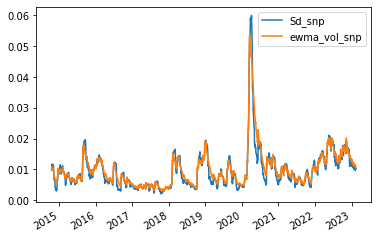

In [565]:
df[['Sd_snp','ewma_vol_snp']].plot()

### Estimación de la covarianza con métodología EWMA

Primero extremos la covarianza semilla que corresponde al primer valor de la serie de covarianzas:

In [566]:
idx = pd.IndexSlice
cov = cov.loc[idx[:,'Log_Returns_btc'],'Log_Returns_snp'].reset_index(level = 1, drop = True)
corr = corr.loc[idx[:,'Log_Returns_btc'],'Log_Returns_snp'].reset_index(level = 1, drop = True)
df = df.join(cov.rename('Cov'), how = 'inner')
df = df.join(corr.rename('Corr'), how = 'inner')
cov_subzero =  df['Cov'].iloc[0]
corr

2014-10-16   -0.283181
2014-10-17   -0.211406
2014-10-20   -0.199882
2014-10-21   -0.149176
2014-10-22   -0.121032
                ...   
2023-02-08    0.460584
2023-02-09    0.506171
2023-02-10    0.488681
2023-02-13    0.489303
2023-02-14    0.501624
Name: Log_Returns_snp, Length: 2097, dtype: float64

Segundo, obtenemos el retorno cruzado y lo usamos en la ecuación para obtener la covarianza con EWMA. 

$$\sigma_{i,j,t}= \lambda * \sigma_{i,j,t-1}+(1-\lambda)r_{i,t-1}r_{j,t-1}$$



In [567]:
df['XY'] = df['Log_Returns_snp']*df['Log_Returns_btc']
def calculateEWMACov(log_returns, sigma_seed, lambda_scalar):
    # Calculate the 
    log_returns = log_returns.dropna()
    log_returns.iloc[0] = sigma_seed
    log_returns = log_returns.ewm(alpha = 1-lambda_scalar, adjust= False).mean()
    return log_returns
df.loc[:,'Covariance (ewma)'] = calculateEWMACov(df['XY'],cov_subzero, 0.94)

Ahora podemos comparar la covarianza paramétrica y la covarianza obtenida por ewma

<AxesSubplot: >

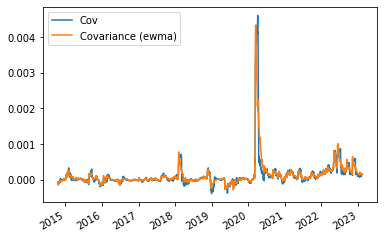

In [568]:
df[['Cov','Covariance (ewma)']].plot()

Podemos obtener a su vez una correlación estimada por ewma y compararla con la correlación tipo pearson. 

<AxesSubplot: >

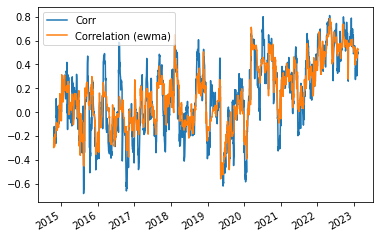

In [569]:
df['Correlation (ewma)'] = df['Covariance (ewma)'] / (df['ewma_vol_snp']*(df['ewma_vol_btc']))   
df[['Corr','Correlation (ewma)']].plot()                                             

### Ejercicio:

Encuentre el coeficiente de Hurst para ambas series y uselo para escalar la matriz de covarianza obtenida con el método EWMA.

In [570]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""    
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]
